<a href="https://colab.research.google.com/github/nitesht2/veho/blob/main/csat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [47]:
from google.colab import files
uploaded = files.upload()


Saving CSAT.csv to CSAT.csv


In [53]:
import io

df = pd.read_csv(io.BytesIO(uploaded['CSAT.csv']))# Dataset is now stored in a Pandas Dataframe

In [54]:
print(df.shape)

(76497, 15)


In [56]:
print(df.dtypes)


route_id            object
route_start_time    object
package_id          object
last_event          object
updated_at          object
consumer_id         object
hub_id              object
city                object
state               object
zip_code            object
instructions        object
market              object
client_id           object
driver_id           object
csat                object
dtype: object


In [58]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

[]


In [59]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['route_id' 'route_start_time' 'package_id' 'last_event' 'updated_at'
 'consumer_id' 'hub_id' 'city' 'state' 'zip_code' 'instructions' 'market'
 'client_id' 'driver_id' 'csat']


https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d


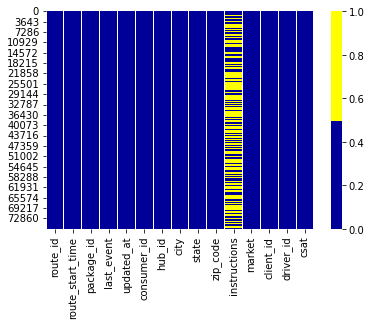

In [60]:
cols = df.columns[:15] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [62]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

route_id - 0%
route_start_time - 0%
package_id - 0%
last_event - 0%
updated_at - 0%
consumer_id - 0%
hub_id - 0%
city - 0%
state - 0%
zip_code - 0%
instructions - 63%
market - 0%
client_id - 0%
driver_id - 0%
csat - 0%


In [66]:
df["csat"].describe()

count     76497
unique     3465
top           5
freq      66933
Name: csat, dtype: object

In [67]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

last_event: 99.89411%
delivered       76416
misdelivered       81
Name: last_event, dtype: int64



In [73]:
# make everything lower case for city column
df['city'] = df['city'].str.lower()

#make upper case for state column
df['state'] = df['state'].str.upper()

In [74]:
print(df)

                route_id           route_start_time         package_id  \
0      22dBziieraLLvCNxw  2021-03-31T11:45:00-06:00  BsdzzTXpNrB8o7K5y   
1      22dBziieraLLvCNxw  2021-03-31T11:45:00-06:00  NjxfPeRD3EKQLThzk   
2      22dBziieraLLvCNxw  2021-03-31T11:45:00-06:00  qjwHLgCDPDP79aQkd   
3      22dBziieraLLvCNxw  2021-03-31T11:45:00-06:00  RzaNsGvfmYwwQYKpF   
4      22dBziieraLLvCNxw  2021-03-31T11:45:00-06:00  wtfGQuJyeimGRz8tg   
...                  ...                        ...                ...   
76492  ZzZNmmLT6Pq2zkJvh  2021-04-06T07:00:00-06:00  iXcL4FARNj4zAtxxD   
76493  ZzZNmmLT6Pq2zkJvh  2021-04-06T07:00:00-06:00  Q4aZKRxNzQ8XZhjQn   
76494  ZzZNmmLT6Pq2zkJvh  2021-04-06T07:00:00-06:00  QjZJjGz7vaaYepu6m   
76495  ZzZNmmLT6Pq2zkJvh  2021-04-06T07:00:00-06:00  quSPv28qttCePCn7a   
76496  ZzZNmmLT6Pq2zkJvh  2021-04-06T07:00:00-06:00  WZDH6QcvvC23Ho4Lo   

      last_event                   updated_at        consumer_id  \
0      delivered  2021-03-31T15:20:20.3-06:

In [78]:
df['updated_at'] = pd.to_datetime(df['updated_at'], format='%Y-%m-%d')
df['year'] = df['updated_at'].dt.year
df['month'] = df['updated_at'].dt.month
df['weekday'] = df['updated_at'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

2021    76497
Name: year, dtype: int64

4    41570
3    34927
Name: month, dtype: int64
